# Backpropogation

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt

np.random.seed(2) #setting seed so that the results are consistent

### Read data from files

In [2]:
X = pd.read_csv("./train_data.csv", header=None)
Y = pd.read_csv("./train_labels.csv", header=None)

### Dividing data into train and validation sets

In [3]:
# Train data - 70% and Validation data - 30%
X_train = X.iloc[0:17327,:]
y_train = Y.iloc[0:17327,:]
X_val = X.iloc[17327:,:]
y_val = Y.iloc[17327:,:]

In [4]:
X_train = np.array(X_train.T)
y_train = np.array(y_train.T)
X_val = np.array(X_val.T)
y_val = np.array(y_val.T)

In [5]:
print ('The shape of X_train is: ' + str(X_train.shape))
print ('The shape of y_train is: ' + str(y_train.shape))
print ('The shape of X_val is: ' + str(X_val.shape))
print ('The shape of y_val is: ' + str(y_val.shape))

The shape of X_train is: (784, 17327)
The shape of y_train is: (4, 17327)
The shape of X_val is: (784, 7427)
The shape of y_val is: (4, 7427)


## Functions to build the network

### Vectorized form :
- We have used vectorized implementation because it is computationally faster.

### Loss/Error Function :
- We have used cross-entropy loss function to compute errors.
- Cross-entropy loss is a loss function widely used for multi-class classification problems. 
- It’s built on the concept of cross-entropy, which is a measurement of two probability vectors (often with one of them being one-hot encoded labels in datasets)

### Activation function : 
- We use non linear activation function because it helps learning easier for next layer. 
- If we were to use liner activation function in the hidden layer then it will compute the linear equation for all the layer thus there won't be any learning during the process.
- **Sigmoid** : 
    - We have used sigmoid function between input and hidden layer.
    - It takes real values as input and gives probability between 0 and 1 as output.
    - This may cause issue of vanishing gradient, which we have solved further.
- **Softmax** :
    - We have used softmax function between hidden and output layer.
    - As we are solving multiclass classification problem, softmax is best choice to get probability based results.


In [6]:
# Defines number of neurons in each layer

def layer_sizes(X, Y):
    n_x=X.shape[0]
    n_h=40
    n_y=Y.shape[0]

    return (n_x, n_h, n_y)

In [7]:
# Intializes random values for weights and bias

def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(2)
    
    W1=np.random.randn(n_h, n_x) * np.sqrt(2/(n_x + n_h))
    b1=np.zeros((n_h, 1))
    W2=np.random.randn(n_y, n_h) * np.sqrt(2/(n_y + n_h))
    b2=np.zeros((n_y, 1))
    
    parameters = {"W1": W1,
                "b1": b1,
                "W2": W2,
                "b2": b2 }
    
    return parameters

To solve the issue of vanishing gradient, we multiplied random initialized weights with sqrt(2/(input_neurons + hiddenlayer_neurons)).

In [8]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [9]:
def softmax(A):
    expA = np.exp(A)
    return expA / expA.sum(axis=0, keepdims=True)

In [10]:
# Calculate outputs using feedforward

def forward_propagation(X, parameters):
    W1= parameters["W1"]
    b1= parameters["b1"]
    W2= parameters["W2"]
    b2= parameters["b2"]
    
    Z1= np.dot(W1,X) + b1 
    A1= sigmoid(Z1)
    Z2= np.dot(W2,A1) + b2
    A2= softmax(Z2)
    
    cache = {"Z1": Z1,
            "A1": A1,
            "Z2": Z2,
            "A2": A2 }
    
    return A2, cache

In [11]:
# Computes cost using Cross entropy loss function

def compute_cost(A2, Y):
    m = Y.shape[1]
    cost = (1/m)*np.sum(-Y * np.log(A2))
    return cost

In [12]:
# Calculate derivatives of weights and biases

def backward_propagation(parameters, cache, X, Y):  
    
    m = X.shape[1] 
    
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    
    A1 = cache["A1"]
    A2 = cache["A2"]

    dz2 = (1/m) * np.subtract(A2,Y) 
    dW2 = np.dot(dz2,A1.T)  
    db2 = np.sum(dz2, axis=1, keepdims=True)
    dz1 = (np.dot(W2.T,dz2))*(A1 - np.power(A1, 2)) 
    dW1 = np.dot(dz1,X.T)
    db1 = np.sum(dz1,axis=1, keepdims=True)
    

    grads = {"dW1": dW1,
    "db1": db1,
    "dW2": dW2,
    "db2": db2 }
    
    return grads

In [13]:
# Update weights using gradient descent algo

def update_parameters(parameters, grads, learning_rate = 0.05):
    W1=parameters["W1"]
    b1=parameters["b1"]
    W2=parameters["W2"]
    b2=parameters["b2"]

    dW1=grads["dW1"]
    db1=grads["db1"]
    dW2=grads["dW2"]
    db2=grads["db2"]
    
    W1= W1 - (learning_rate*dW1)
    b1= b1 - (learning_rate*db1)
    W2= W2 - (learning_rate*dW2)
    b2= b2 - (learning_rate*db2)
    
    parameters = {"W1": W1,
    "b1": b1,
    "W2": W2,
    "b2": b2 }
    
    return parameters

We tried different learning rates and 0.05 is giving best results.

### Predictions of validation set

In [14]:
def predict(pred_parameters, X):
    A2, cache = forward_propagation(X, pred_parameters)
    predictions = np.argmax(A2, axis=0) 
    
    return predictions

In [15]:
# Converting to one-hot encodings
def onehot_encoded(y):   
    my_list = list()
    for i in y:
        temp = [0, 0, 0, 0]
        temp[i] = 1
        my_list.append(temp)
        
    return np.array(my_list)

### Calculating accuracy

In [16]:
from acc_calc import accuracy

## Network - combining all functions together

In [17]:
# Creation of neural network

def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    accuracy_matrix = []
    
    for i in range(0, num_iterations+1):
        A2, cache = forward_propagation(X, parameters)
        cost = compute_cost(A2, Y)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads)
        preds2 = predict(parameters, X_val)
        preds = onehot_encoded(preds2)
        accuracy_val = accuracy(y_val.T, preds)
        accuracy_matrix.append(accuracy_val)
        print("Accuracy after iteration %i: %f" %(i, accuracy_val)) 

        if print_cost and i % 10 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        
    return parameters, accuracy_matrix

In [18]:
parameters, accuracy_matrix = nn_model(X_train, y_train, 32, num_iterations=150, print_cost=False)

Accuracy after iteration 0: 0.281944
Accuracy after iteration 1: 0.297294
Accuracy after iteration 2: 0.314259
Accuracy after iteration 3: 0.330416
Accuracy after iteration 4: 0.344150
Accuracy after iteration 5: 0.363404
Accuracy after iteration 6: 0.397738
Accuracy after iteration 7: 0.443113
Accuracy after iteration 8: 0.492931
Accuracy after iteration 9: 0.542615
Accuracy after iteration 10: 0.586105
Accuracy after iteration 11: 0.623805
Accuracy after iteration 12: 0.659351
Accuracy after iteration 13: 0.686011
Accuracy after iteration 14: 0.710920
Accuracy after iteration 15: 0.730039
Accuracy after iteration 16: 0.743907
Accuracy after iteration 17: 0.758584
Accuracy after iteration 18: 0.769759
Accuracy after iteration 19: 0.779992
Accuracy after iteration 20: 0.788474
Accuracy after iteration 21: 0.799515
Accuracy after iteration 22: 0.803959
Accuracy after iteration 23: 0.810825
Accuracy after iteration 24: 0.817558
Accuracy after iteration 25: 0.822539
Accuracy after iterati

We chose 150 epochs, and didn't increase to avoid overfitting issue.

### Loss vs epochs

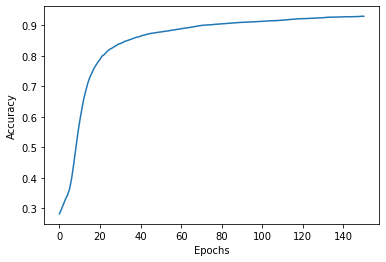

In [19]:
plt.plot(range(0,151), accuracy_matrix)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

### Saving weights to pickle file

In [20]:
file = open('weights.pkl', 'wb+')
pickle.dump(parameters, file)
file.close()